# Data Preparation

In [1]:
# import libraries
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
import ta
import seaborn as sns

# historical data for Big 8 stocks
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN", "NVDA", "NFLX", "TSLA"]
start = '2017-12-31'
end = '2022-12-31'
today = dt.datetime.today()
adj_price_df = pd.DataFrame()
ohlcv_data = {}

In [2]:
for ticker in tickers:
    adj_price_df[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
adj_price_df

AAPL        MSFT      GOOGL        META       AMZN  \
Date                                                                   
2018-01-02   40.722870   80.391838  53.660500  181.419998  59.450500   
2018-01-03   40.715786   80.765984  54.576000  184.669998  60.209999   
2018-01-04   40.904907   81.476830  54.787998  184.330002  60.479500   
2018-01-05   41.370617   82.486992  55.514500  186.850006  61.457001   
2018-01-08   41.216965   82.571175  55.710499  188.279999  62.343498   
...                ...         ...        ...         ...        ...   
2022-12-23  131.127075  237.112076  89.230003  118.040001  85.250000   
2022-12-27  129.307220  235.354080  87.389999  116.879997  83.040001   
2022-12-28  125.339409  232.940552  86.019997  115.620003  81.820000   
2022-12-29  128.889557  239.376648  88.449997  120.260002  84.180000   
2022-12-30  129.207779  238.194702  88.230003  120.339996  84.000000   

                  NVDA        NFLX        TSLA  
Date                                            
2018-01-02   49.317127  201.070007   21.368668  
2018-01-03   52.562881  205.050003   21.150000  
2018-01-04   52.839962  205.630005   20.974667  
2018-01-05   53.287720  209.990005   21.105333  
2018-01-08   54.920498  212.050003   22.427334  
...                ...         ...         ...  
2022-12-23  152.005920  294.959991  123.150002  
2022-12-27  141.159805  284.170013  109.099998  
2022-12-28  140.310074  276.880005  112.709999  
2022-12-29  145.978073  291.119995  121.820000  
2022-12-30  146.088028  294.880005  123.180000  

[1259 rows x 8 columns]

# Data Exploration

In [4]:
daily_return_df = adj_price_df.pct_change()

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

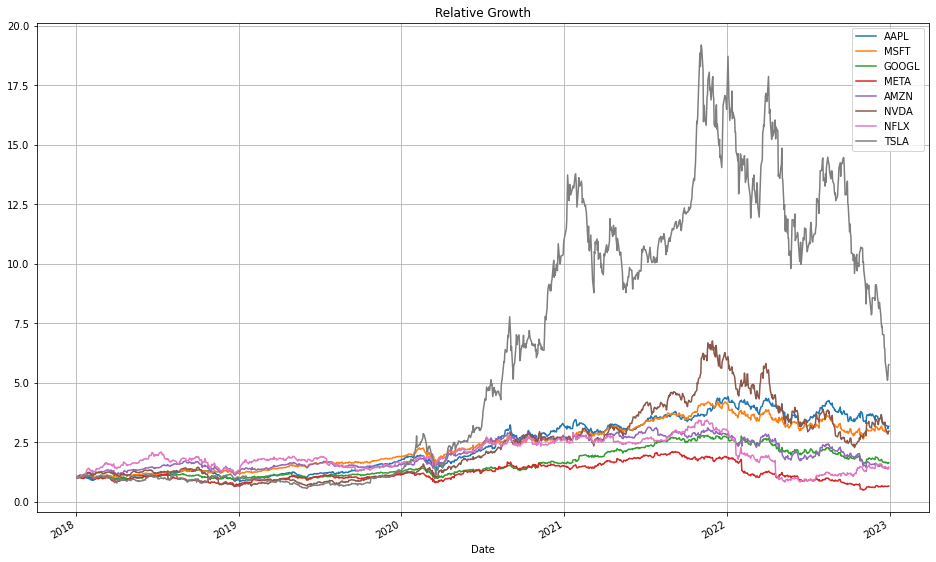

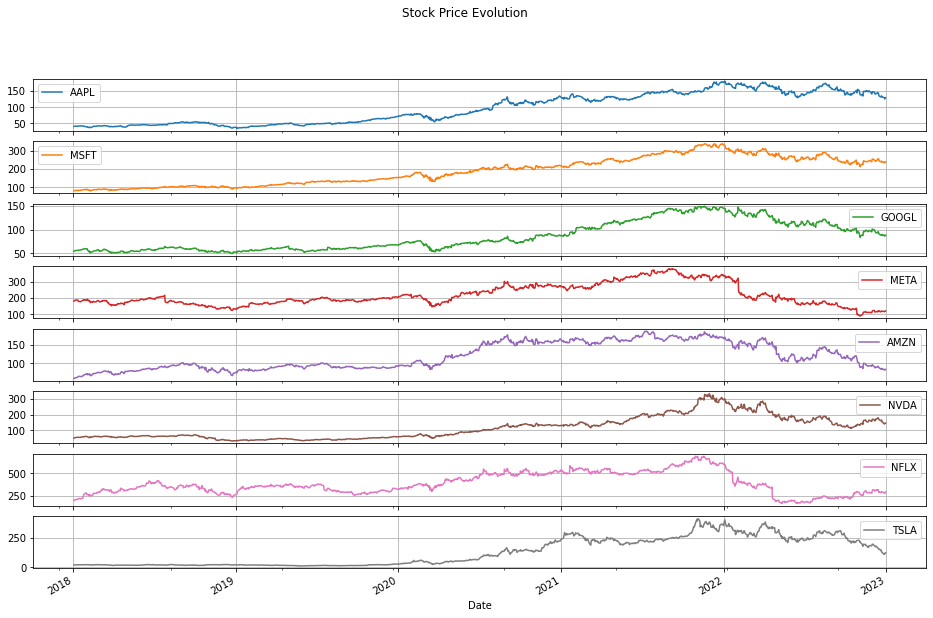

In [5]:
(1 + daily_return_df).cumprod().plot(figsize=(16, 10), title="Relative Growth", grid=True)
adj_price_df.plot(figsize=(16, 10), subplots=True, layout=(8, 1), title="Stock Price Evolution", grid =True) # Subplots of the stocks

In [6]:
daily_return_df.corr()

AAPL      MSFT     GOOGL      META      AMZN      NVDA      NFLX  \
AAPL   1.000000  0.772959  0.700822  0.584575  0.652026  0.665125  0.482989   
MSFT   0.772959  1.000000  0.808735  0.622377  0.715261  0.719511  0.533182   
GOOGL  0.700822  0.808735  1.000000  0.675031  0.682788  0.672557  0.518602   
META   0.584575  0.622377  0.675031  1.000000  0.610645  0.567400  0.525794   
AMZN   0.652026  0.715261  0.682788  0.610645  1.000000  0.646492  0.613882   
NVDA   0.665125  0.719511  0.672557  0.567400  0.646492  1.000000  0.519985   
NFLX   0.482989  0.533182  0.518602  0.525794  0.613882  0.519985  1.000000   
TSLA   0.466155  0.461371  0.411227  0.339746  0.434532  0.479659  0.381368   

           TSLA  
AAPL   0.466155  
MSFT   0.461371  
GOOGL  0.411227  
META   0.339746  
AMZN   0.434532  
NVDA   0.479659  
NFLX   0.381368  
TSLA   1.000000

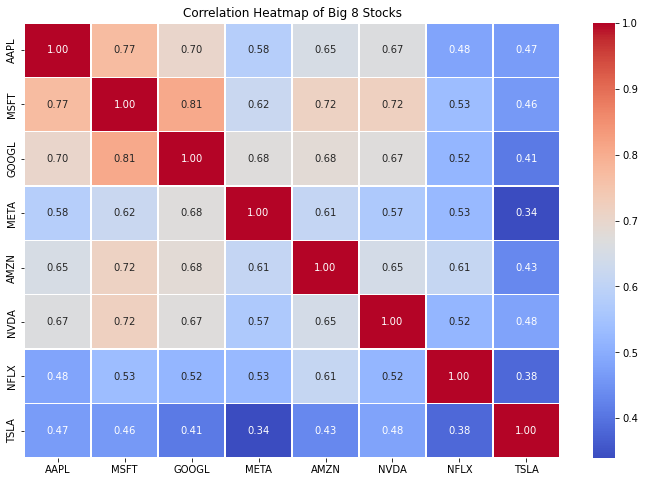

In [34]:
correlation_matrix = daily_return_df.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 종목별 상관관계 히트맵 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Big 8 Stocks')
plt.show()


# SMA Strategy

In [7]:
sma_df = pd.DataFrame()

In [8]:
for ticker in tickers:
    sma_df[ticker] = adj_price_df[ticker]
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_sma200"] = adj_price_df[ticker].rolling(window=200).mean()

In [9]:
sma_df.dropna(inplace=True)
sma_df

AAPL  AAPL_sma20  AAPL_sma50  AAPL_sma200        MSFT  \
Date                                                                      
2018-10-16   53.120152   53.252980   52.520881    45.128287  105.164902   
2018-10-17   52.890598   53.286696   52.591679    45.189126  104.890152   
2018-10-18   51.654354   53.238753   52.637084    45.243819  102.796326   
2018-10-19   52.441051   53.258480   52.690455    45.301499  102.947906   
2018-10-22   52.761467   53.256806   52.753200    45.358454  103.866920   
...                ...         ...         ...          ...         ...   
2022-12-23  131.127075  139.879145  143.258232   150.924020  237.112076   
2022-12-27  129.307220  139.173589  143.096718   150.804671  235.354080   
2022-12-28  125.339409  138.421293  142.775828   150.685827  232.940552   
2022-12-29  128.889557  137.505412  142.499335   150.562608  239.376648   
2022-12-30  129.207779  136.591520  142.227021   150.418706  238.194702   

            MSFT_sma20  MSFT_sma50  MSFT_sma200      GOOGL  GOOGL_sma20  ...  \
Date                                                                     ...   
2018-10-16  106.378091  104.860392    93.975796  56.653999    58.331400  ...   
2018-10-17  106.331193  104.902978    94.098287  56.379501    58.214700  ...   
2018-10-18  106.091020  104.892172    94.208439  54.895500    57.980550  ...   
2018-10-19  105.825739  104.881000    94.315794  55.258999    57.813200  ...   
2018-10-22  105.586987  104.900856    94.422694  55.568501    57.642725  ...   
...                ...         ...          ...        ...          ...  ...   
2022-12-23  245.494889  238.714057   259.043897  89.230003    94.038001  ...   
2022-12-27  245.256516  238.893678   258.839870  87.389999    93.605001  ...   
2022-12-28  244.968480  238.847344   258.641672  86.019997    93.146500  ...   
2022-12-29  244.266769  238.910518   258.422852  88.449997    92.519500  ...   
2022-12-30  243.528308  238.990067   258.162428  88.230003    91.881501  ...   

            NVDA_sma50  NVDA_sma200        NFLX  NFLX_sma20  NFLX_sma50  \
Date                                                                      
2018-10-16   65.980037    61.193839  346.399994  359.338998  353.974798   
2018-10-17   65.911885    61.248443  364.700012  359.225999  354.232198   
2018-10-18   65.818955    61.282445  346.709991  358.293500  354.214199   
2018-10-19   65.684383    61.302223  332.670013  356.867500  353.880399   
2018-10-22   65.568246    61.322303  329.540009  354.864001  353.553799   
...                ...          ...         ...         ...         ...   
2022-12-23  151.068546   171.710133  294.959991  303.174500  288.902801   
2022-12-27  151.647715   171.312169  284.170013  303.324500  289.986201   
2022-12-28  152.077770   170.948413  276.880005  303.120500  290.621801   
2022-12-29  152.605395   170.530939  291.119995  302.400000  291.627001   
2022-12-30  153.118428   170.037950  294.880005  301.296500  292.077001   

            NFLX_sma200        TSLA  TSLA_sma20  TSLA_sma50  TSLA_sma200  
Date                                                                      
2018-10-16    327.55070   18.439333   18.822400   20.077240    20.861733  
2018-10-17    328.36885   18.118668   18.731600   19.933520    20.845483  
2018-10-18    329.07715   17.594000   18.616867   19.791613    20.827703  
2018-10-19    329.71235   17.333332   18.486533   19.668347    20.809497  
2018-10-22    330.31010   17.396667   18.357433   19.542293    20.790953  
...                 ...         ...         ...         ...          ...  
2022-12-23    250.08970  123.150002  165.201000  187.790000   255.097317  
2022-12-27    249.80895  109.099998  161.510000  185.872200   254.317234  
2022-12-28    249.53830  112.709999  158.104000  183.739400   253.603501  
2022-12-29    249.27515  121.820000  154.460000  181.772000   252.876117  
2022-12-30    248.96190  123.180000  150.884000  179.794800   252.091634  

[1060 rows x 32 columns]

In [10]:
for ticker in tickers:
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] > sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] > sma_df[ticker + '_sma200']), 1, 0)
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] < sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] < sma_df[ticker + '_sma200']), -1, sma_df[ticker + '_position'])

In [11]:
sma_df

AAPL  AAPL_sma20  AAPL_sma50  AAPL_sma200        MSFT  \
Date                                                                      
2018-10-16   53.120152   53.252980   52.520881    45.128287  105.164902   
2018-10-17   52.890598   53.286696   52.591679    45.189126  104.890152   
2018-10-18   51.654354   53.238753   52.637084    45.243819  102.796326   
2018-10-19   52.441051   53.258480   52.690455    45.301499  102.947906   
2018-10-22   52.761467   53.256806   52.753200    45.358454  103.866920   
...                ...         ...         ...          ...         ...   
2022-12-23  131.127075  139.879145  143.258232   150.924020  237.112076   
2022-12-27  129.307220  139.173589  143.096718   150.804671  235.354080   
2022-12-28  125.339409  138.421293  142.775828   150.685827  232.940552   
2022-12-29  128.889557  137.505412  142.499335   150.562608  239.376648   
2022-12-30  129.207779  136.591520  142.227021   150.418706  238.194702   

            MSFT_sma20  MSFT_sma50  MSFT_sma200      GOOGL  GOOGL_sma20  ...  \
Date                                                                     ...   
2018-10-16  106.378091  104.860392    93.975796  56.653999    58.331400  ...   
2018-10-17  106.331193  104.902978    94.098287  56.379501    58.214700  ...   
2018-10-18  106.091020  104.892172    94.208439  54.895500    57.980550  ...   
2018-10-19  105.825739  104.881000    94.315794  55.258999    57.813200  ...   
2018-10-22  105.586987  104.900856    94.422694  55.568501    57.642725  ...   
...                ...         ...          ...        ...          ...  ...   
2022-12-23  245.494889  238.714057   259.043897  89.230003    94.038001  ...   
2022-12-27  245.256516  238.893678   258.839870  87.389999    93.605001  ...   
2022-12-28  244.968480  238.847344   258.641672  86.019997    93.146500  ...   
2022-12-29  244.266769  238.910518   258.422852  88.449997    92.519500  ...   
2022-12-30  243.528308  238.990067   258.162428  88.230003    91.881501  ...   

            TSLA_sma50  TSLA_sma200  AAPL_position  MSFT_position  \
Date                                                                
2018-10-16   20.077240    20.861733              1              1   
2018-10-17   19.933520    20.845483              1              1   
2018-10-18   19.791613    20.827703              1              1   
2018-10-19   19.668347    20.809497              1              1   
2018-10-22   19.542293    20.790953              1              1   
...                ...          ...            ...            ...   
2022-12-23  187.790000   255.097317             -1              0   
2022-12-27  185.872200   254.317234             -1              0   
2022-12-28  183.739400   253.603501             -1              0   
2022-12-29  181.772000   252.876117             -1              0   
2022-12-30  179.794800   252.091634             -1              0   

            GOOGL_position  META_position  AMZN_position  NVDA_position  \
Date                                                                      
2018-10-16               0             -1              0              0   
2018-10-17               0             -1              0              0   
2018-10-18               0             -1              0              0   
2018-10-19               0             -1              0              0   
2018-10-22               0             -1              0              0   
...                    ...            ...            ...            ...   
2022-12-23              -1              0             -1              0   
2022-12-27              -1              0             -1              0   
2022-12-28              -1              0             -1              0   
2022-12-29              -1              0             -1              0   
2022-12-30              -1              0             -1              0   

            NFLX_position  TSLA_position  
Date                                      
2018-10-16              1             -1 

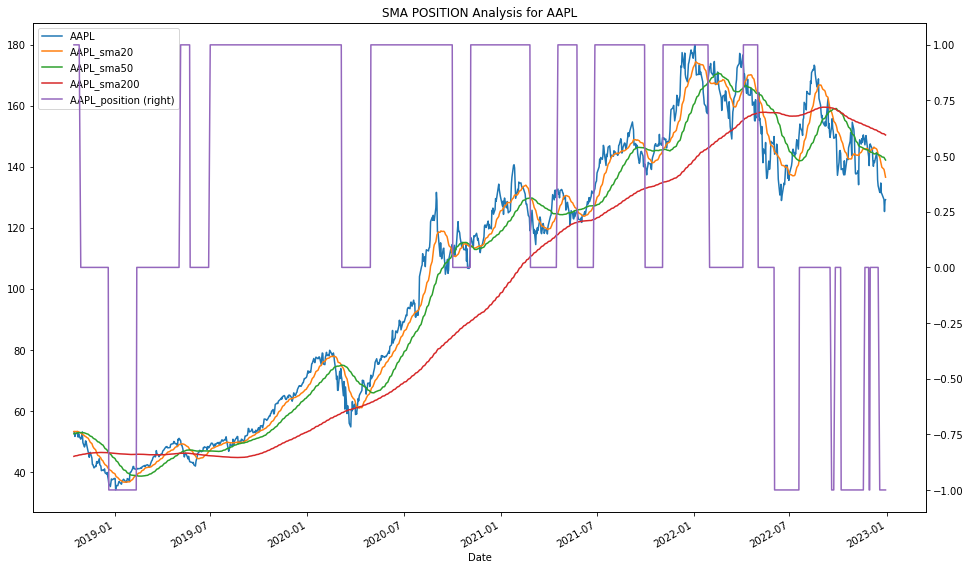

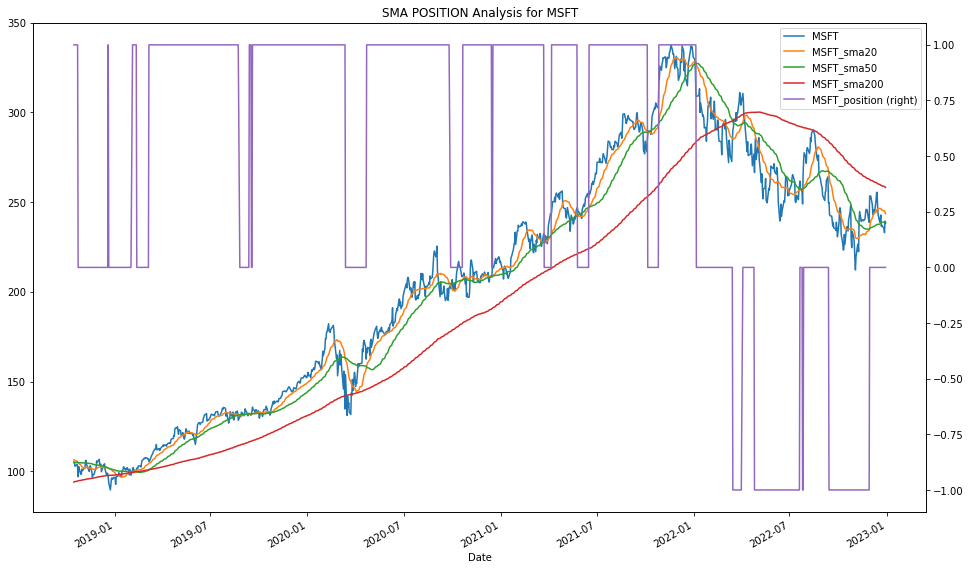

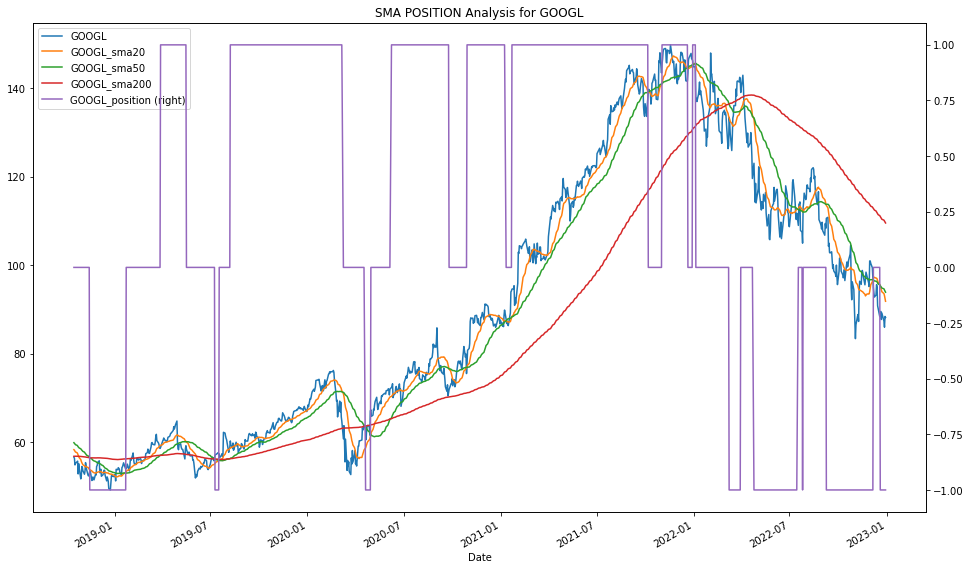

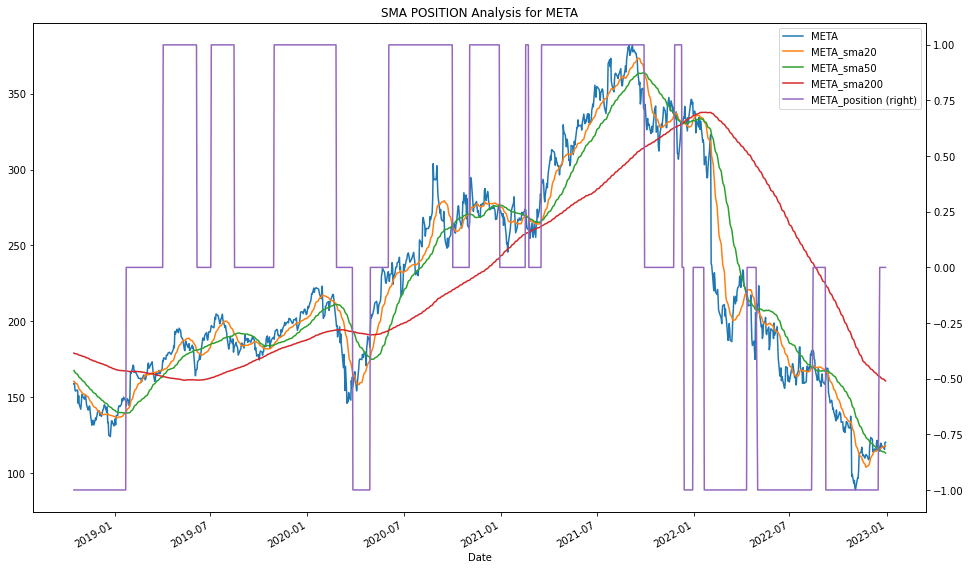

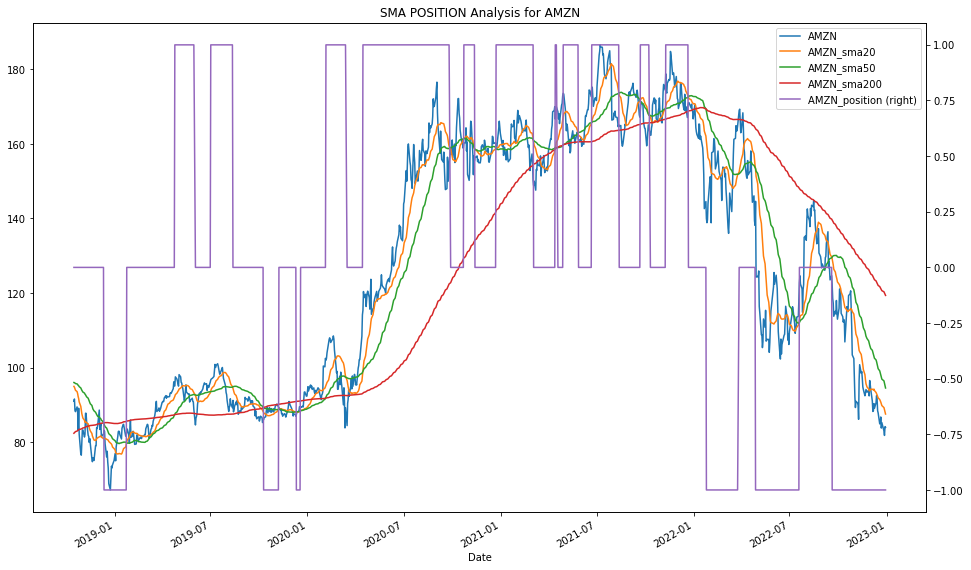

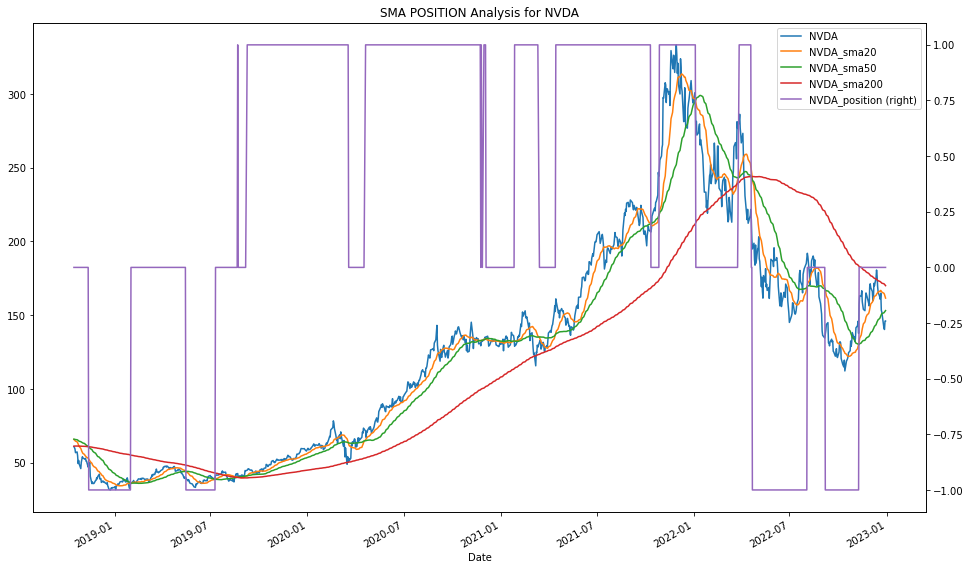

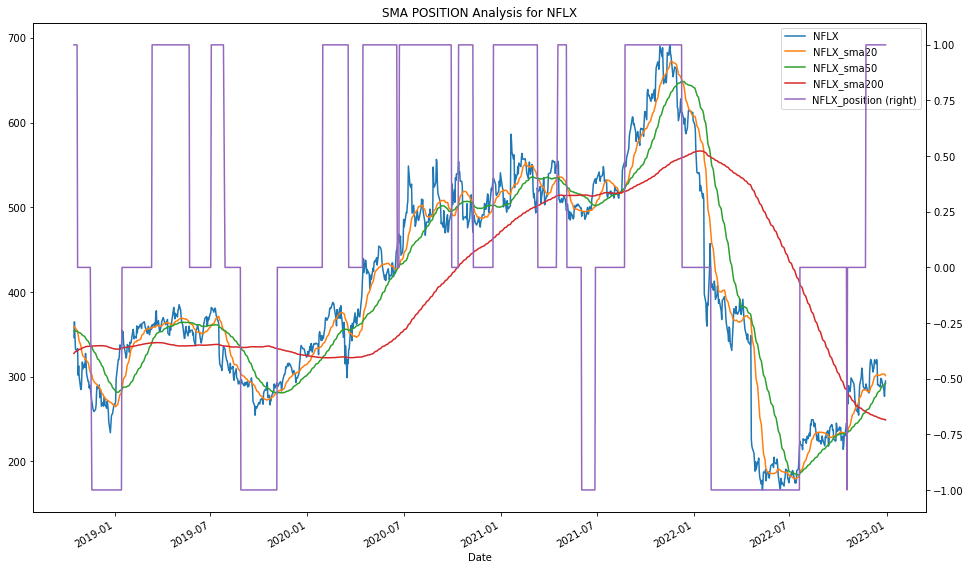

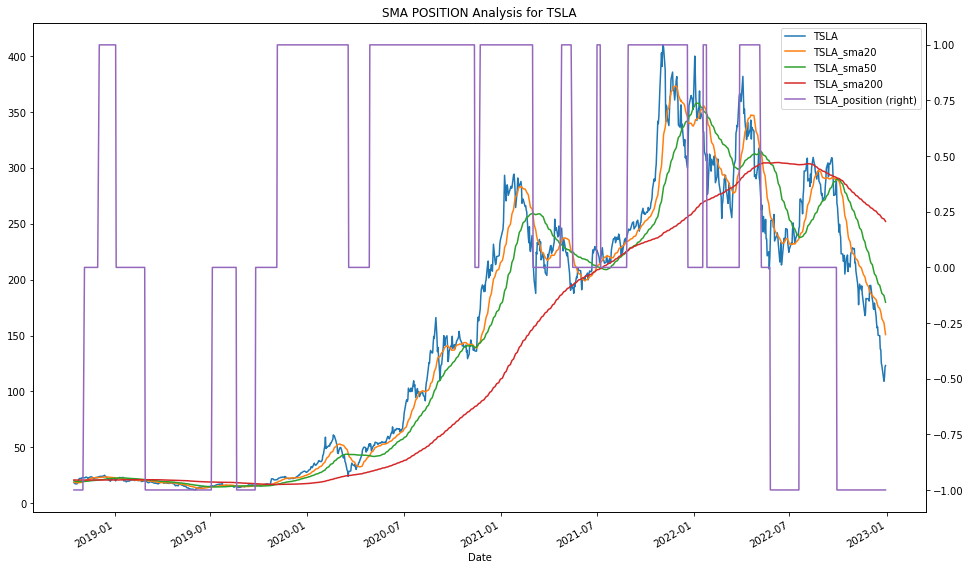

In [12]:
#시각화
for ticker in tickers:
    ax = sma_df[[ticker, ticker + '_sma20', ticker + '_sma50', ticker + '_sma200', ticker + '_position']].plot(figsize=(16, 10), secondary_y=(ticker + '_position'))
    ax.get_legend()
    ax.set_title(f'SMA POSITION Analysis for {ticker}')

# MACD STRATEGY

In [13]:
macd_df = pd.DataFrame()

< MACD 기본 포지션 진입,종료 로직>
- MACD 선이 MACD 시그널 선을 돌파하면 포지션 진입
- MACD 선이 MACD 시그널 선을 재돌파하면 포지션 종료

In [14]:
for ticker in tickers:
    #close 넣어주자 
    macd_df[ticker] = adj_price_df[ticker]

    # MACD 계산
    # 단기 이동 평균 기간 12일, 장기 이동 평균 기간 26일
    macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)

    # MACD 시그널 계산
    # 신호선의 이동 평균 기간을 9일로 설정합니다.
    macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)

    # MACD와 시그널선의 차이
    macd_df[ticker + "_macd_diff"] = ta.trend.macd_diff(adj_price_df[ticker], 12, 26, 9)


In [15]:
macd_df.dropna(inplace=True)
macd_df

AAPL  AAPL_macd  AAPL_macd_signal  AAPL_macd_diff  \
Date                                                                  
2018-02-20   40.791592   0.149671          0.567562       -0.417890   
2018-02-21   40.606445   0.060576          0.466165       -0.405588   
2018-02-22   40.945877  -0.036995          0.365533       -0.402528   
2018-02-23   41.657986  -0.169825          0.258461       -0.428286   
2018-02-26   42.481644  -0.337663          0.139236       -0.476900   
...                ...        ...               ...             ...   
2022-12-23  131.127075   3.634479          2.533943        1.100536   
2022-12-27  129.307220   3.899656          2.807086        1.092571   
2022-12-28  125.339409   4.379497          3.121568        1.257929   
2022-12-29  128.889557   4.422328          3.381720        1.040608   
2022-12-30  129.207779   4.380104          3.581397        0.798707   

                  MSFT  MSFT_macd  MSFT_macd_signal  MSFT_macd_diff  \
Date                                                                  
2018-02-20   87.131454  -0.620809         -0.437158       -0.183651   
2018-02-21   85.975555  -0.629589         -0.475644       -0.153945   
2018-02-22   86.201111  -0.647286         -0.509972       -0.137313   
2018-02-23   88.390656  -0.828439         -0.573666       -0.254773   
2018-02-26   89.668686  -1.062878         -0.671508       -0.391370   
...                ...        ...               ...             ...   
2022-12-23  237.112076   0.190022         -1.549909        1.739931   
2022-12-27  235.354080   0.752404         -1.089447        1.841851   
2022-12-28  232.940552   1.376974         -0.596163        1.973137   
2022-12-29  239.376648   1.337197         -0.209491        1.546688   
2022-12-30  238.194702   1.385081          0.109424        1.275657   

                GOOGL  GOOGL_macd  ...  NVDA_macd_signal  NVDA_macd_diff  \
Date                               ...                                     
2018-02-20  55.179501    0.573279  ...         -1.079341       -0.323936   
2018-02-21  55.687500    0.429856  ...         -1.138954       -0.238453   
2018-02-22  55.494999    0.327945  ...         -1.182572       -0.174470   
2018-02-23  56.404499    0.171810  ...         -1.226110       -0.174154   
2018-02-26  57.185001   -0.014738  ...         -1.267090       -0.163917   
...               ...         ...  ...               ...             ...   
2022-12-23  89.230003    2.062129  ...         -4.408540        3.019979   
2022-12-27  87.389999    2.210383  ...         -3.441763        3.867109   
2022-12-28  86.019997    2.410636  ...         -2.371523        4.280960   
2022-12-29  88.449997    2.346211  ...         -1.377563        3.975840   
2022-12-30  88.230003    2.286547  ...         -0.482133        3.581719   

                  NFLX  NFLX_macd  NFLX_macd_signal  NFLX_macd_diff  \
Date                                                                  
2018-02-20  278.549988 -11.664931        -11.702805        0.037874   
2018-02-21  281.040009 -11.948837        -11.752011       -0.196826   
2018-02-22  278.140015 -11.803763        -11.762362       -0.041402   
2018-02-23  285.929993 -12.177008        -11.845291       -0.331717   
2018-02-26  294.160004 -12.987193        -12.073671       -0.913521   
...                ...        ...               ...             ...   
2022-12-23  294.959991  -1.990539         -4.998226        3.007686   
2022-12-27  284.170013  -0.678229         -4.134226        3.455998   
2022-12-28  276.880005   0.939203         -3.119540        4.058744   
2022-12-29  291.119995   1.059765         -2.283679        3.343444   
2022-12-30  294.880005   0.842201         -1.658503        2.500705   

                  TSLA  TSLA_macd  TSLA_macd_signal  TSLA_macd_diff  
Date                                                                 
2018-02-20   22.318001   0.108737          0.084682        0.024055  
2018-02-21   22.219999   0.089474          0.08

In [16]:
for ticker in tickers:
    # MACD 지표 계산
    macd_df[ticker + '_macd'] = ta.trend.macd(sma_df[ticker], 12, 26)
    macd_df[ticker + '_macd_signal'] = ta.trend.macd_signal(sma_df[ticker], 12, 26, 9)

    # 포지션 결정
    # MACD가 신호선 위에 있으면 매수 포지션(1), 아래에 있으면 매도 포지션(-1)
    macd_df[ticker + '_position'] = np.where(macd_df[ticker + '_macd'] > macd_df[ticker + '_macd_signal'], 1, np.where(macd_df[ticker + '_macd'] < macd_df[ticker + '_macd_signal'], -1, 0))

    # 포지션 유지 또는 종료 로직
    # 이전 포지션을 유지하기 위해 'ffill'을 사용
    macd_df[ticker + '_position'] = macd_df[ticker + '_position'].replace(to_replace=0, method='ffill')


In [17]:
macd_df

AAPL  AAPL_macd  AAPL_macd_signal  AAPL_macd_diff  \
Date                                                                  
2018-02-20   40.791592        NaN               NaN       -0.417890   
2018-02-21   40.606445        NaN               NaN       -0.405588   
2018-02-22   40.945877        NaN               NaN       -0.402528   
2018-02-23   41.657986        NaN               NaN       -0.428286   
2018-02-26   42.481644        NaN               NaN       -0.476900   
...                ...        ...               ...             ...   
2022-12-23  131.127075   3.634479          2.533943        1.100536   
2022-12-27  129.307220   3.899656          2.807086        1.092571   
2022-12-28  125.339409   4.379497          3.121568        1.257929   
2022-12-29  128.889557   4.422328          3.381720        1.040608   
2022-12-30  129.207779   4.380104          3.581397        0.798707   

                  MSFT  MSFT_macd  MSFT_macd_signal  MSFT_macd_diff  \
Date                                                                  
2018-02-20   87.131454        NaN               NaN       -0.183651   
2018-02-21   85.975555        NaN               NaN       -0.153945   
2018-02-22   86.201111        NaN               NaN       -0.137313   
2018-02-23   88.390656        NaN               NaN       -0.254773   
2018-02-26   89.668686        NaN               NaN       -0.391370   
...                ...        ...               ...             ...   
2022-12-23  237.112076   0.190022         -1.549909        1.739931   
2022-12-27  235.354080   0.752404         -1.089447        1.841851   
2022-12-28  232.940552   1.376974         -0.596163        1.973137   
2022-12-29  239.376648   1.337197         -0.209491        1.546688   
2022-12-30  238.194702   1.385081          0.109424        1.275657   

                GOOGL  GOOGL_macd  ...  TSLA_macd_signal  TSLA_macd_diff  \
Date                               ...                                     
2018-02-20  55.179501         NaN  ...               NaN        0.024055   
2018-02-21  55.687500         NaN  ...               NaN        0.003833   
2018-02-22  55.494999         NaN  ...               NaN       -0.064579   
2018-02-23  56.404499         NaN  ...               NaN       -0.129723   
2018-02-26  57.185001         NaN  ...               NaN       -0.186938   
...               ...         ...  ...               ...             ...   
2022-12-23  89.230003    2.062129  ...         13.664886        3.579883   
2022-12-27  87.389999    2.210383  ...         14.746507        4.326487   
2022-12-28  86.019997    2.410636  ...         15.797212        4.202820   
2022-12-29  88.449997    2.346211  ...         16.592110        3.179590   
2022-12-30  88.230003    2.286547  ...         17.125488        2.133511   

            AAPL_position  MSFT_position  GOOGL_position  META_position  \
Date                                                                      
2018-02-20              0              0               0              0   
2018-02-21              0              0               0              0   
2018-02-22              0              0               0              0   
2018-02-23              0              0               0              0   
2018-02-26              0              0               0              0   
...                   ...            ...             ...            ...   
2022-12-23              1              1               1             -1   
2022-12-27              1              1               1             -1   
2022-12-28              1              1               1              1   
2022-12-29              1              1               1             -1   
2022-12-30              1              1               1             -1   

            AMZN_position  NVDA_position  NFLX_position  TSLA_position  
Date                                                                    
2018-02-20              0              0              0    

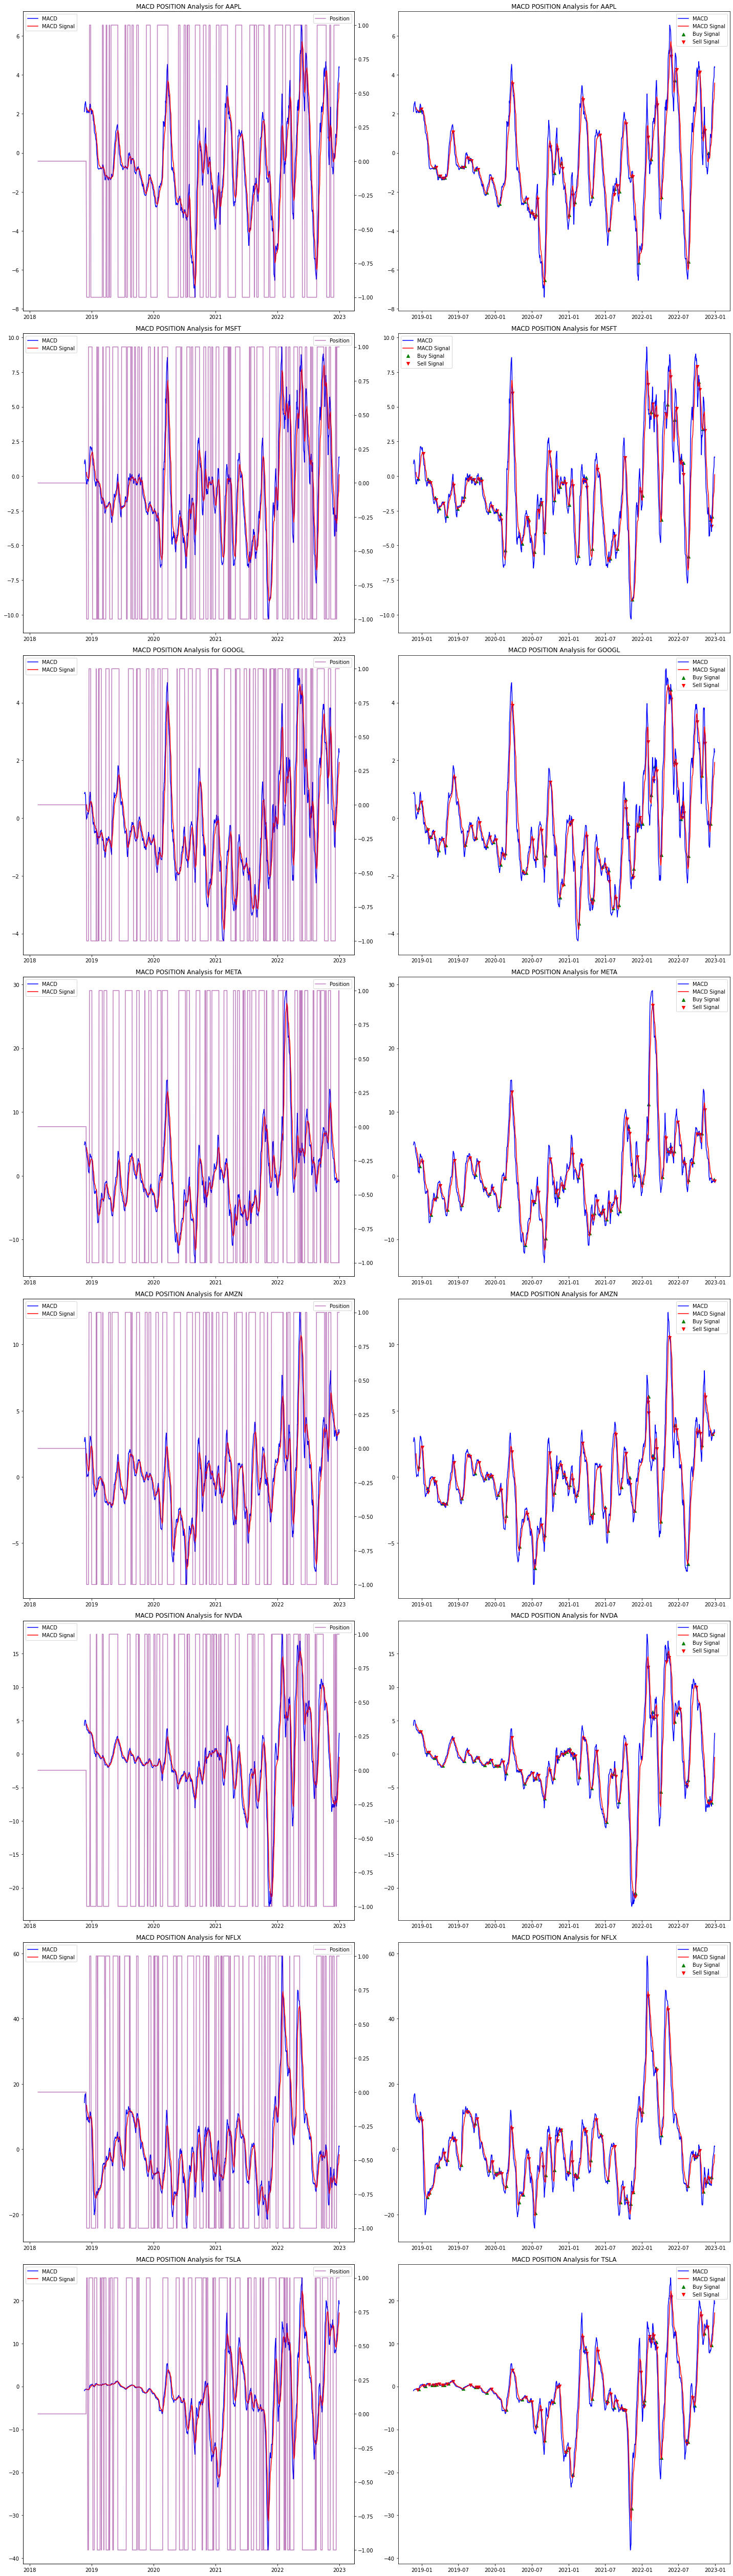

In [35]:
# 진입횟수가 잦아서 macd는 선그래프만으로 보면 가독성 떨어져서 마커 추가 
# 8행 2열 서브플롯 
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = macd_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 MACD 선 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax1.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, macd_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'MACD POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 MACD 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax2.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    buy_signals = (macd_df[ticker + '_macd'].values > macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) <= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    sell_signals = (macd_df[ticker + '_macd'].values < macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) >= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    ax2.scatter(index_array[buy_signals], macd_df[ticker + '_macd'][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], macd_df[ticker + '_macd'][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2.set_title(f'MACD POSITION Analysis for {ticker}')
    ax2.legend()

plt.tight_layout()
plt.show()


# RSI STRATEGY

In [19]:
rsi_df = pd.DataFrame()


<RSI 기본 포지션 종료 로직>
- 중립 구간 설정: 포지션을 열 때 사용된 임계값(ex: 30과 70)과는 다른, 중립적인 임계값을 설정하여 이 구간에 들어오면 포지션을 종료
- 예를 들어, 공매수 포지션(30 이하에서 시작)은 RSI가 5055 사이에 들어오면 종료하고, 공매도 포지션(70 이상에서 시작)은 RSI가 4550 사이에 들어오면 종료

In [20]:
for ticker in tickers:
    # RSI 계산
    rsi = RSIIndicator(adj_price_df[ticker]).rsi()

    # 트레이딩 신호 생성
    long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 공매수 신호
    short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 공매도 신호

    # 포지션 종료 신호 생성
    exit_long_signal = np.where((rsi >= 50) & (rsi <= 55), -1, 0)  # 공매수 포지션 종료 신호
    exit_short_signal = np.where((rsi <= 50) & (rsi >= 45), 1, 0)  # 공매도 포지션 종료 신호

    # 최종 포지션 결정
    position = np.zeros_like(rsi)  # 포지션 배열 초기화
    for i in range(1, len(rsi)):
        if position[i-1] != 0:  # 이미 포지션에 있는 경우
            # 현재 포지션 유지 또는 종료 여부 확인
            if (position[i-1] == 1 and exit_long_signal[i] == -1) or (position[i-1] == -1 and exit_short_signal[i] == 1):
                position[i] = 0  # 포지션 종료
            else:
                position[i] = position[i-1]  # 기존 포지션 유지
        else:
            # 새로운 포지션 결정
            position[i] = long_signal[i] + short_signal[i]

    # 결과 저장
    rsi_df[ticker + '_RSI'] = rsi
    rsi_df[ticker + '_position'] = position



In [21]:
rsi_df


AAPL_RSI  AAPL_position   MSFT_RSI  MSFT_position  GOOGL_RSI  \
Date                                                                        
2018-01-02        NaN            0.0        NaN            0.0        NaN   
2018-01-03        NaN            0.0        NaN            0.0        NaN   
2018-01-04        NaN            0.0        NaN            0.0        NaN   
2018-01-05        NaN            0.0        NaN            0.0        NaN   
2018-01-08        NaN            0.0        NaN            0.0        NaN   
...               ...            ...        ...            ...        ...   
2022-12-23  35.694668            0.0  44.140500            0.0  40.009451   
2022-12-27  33.675325            0.0  42.575135            0.0  36.714162   
2022-12-28  29.726647            1.0  40.454043            0.0  34.439705   
2022-12-29  36.860456            1.0  47.907136            0.0  41.376879   
2022-12-30  37.473181            1.0  46.749893            0.0  40.954375   

            GOOGL_position   META_RSI  META_position   AMZN_RSI  \
Date                                                              
2018-01-02             0.0        NaN            0.0        NaN   
2018-01-03             0.0        NaN            0.0        NaN   
2018-01-04             0.0        NaN            0.0        NaN   
2018-01-05             0.0        NaN            0.0        NaN   
2018-01-08             0.0        NaN            0.0        NaN   
...                    ...        ...            ...        ...   
2022-12-23             0.0  52.010119            0.0  38.027561   
2022-12-27             0.0  50.473977            0.0  34.876981   
2022-12-28             0.0  48.788379            0.0  33.239777   
2022-12-29             0.0  54.777645            0.0  39.186785   
2022-12-30             0.0  54.875626            0.0  38.902142   

            AMZN_position   NVDA_RSI  NVDA_position   NFLX_RSI  NFLX_position  \
Date                                                                            
2018-01-02            0.0        NaN            0.0        NaN            0.0   
2018-01-03            0.0        NaN            0.0        NaN            0.0   
2018-01-04            0.0        NaN            0.0        NaN            0.0   
2018-01-05            0.0        NaN            0.0        NaN            0.0   
2018-01-08            0.0        NaN            0.0        NaN            0.0   
...                   ...        ...            ...        ...            ...   
2022-12-23            1.0  42.515514            0.0  49.090684            0.0   
2022-12-27            1.0  35.994771            0.0  43.265590            0.0   
2022-12-28            1.0  35.534941            0.0  39.827050            0.0   
2022-12-29            1.0  40.953513            0.0  48.446099            0.0   
2022-12-30            1.0  41.057018            0.0  50.463746            0.0   

             TSLA_RSI  TSLA_position  
Date                                  
2018-01-02        NaN            0.0  
2018-01-03        NaN            0.0  
2018-01-04        NaN            0.0  
2018-01-05        NaN            0.0  
2018-01-08        NaN            0.0  
...               ...            ...  
2022-12-23  19.819923            1.0  
2022-12-27  16.564126            1.0  
2022-12-28  20.191722            1.0  
2022-12-29  28.625201            1.0  
2022-12-30  29.817521            1.0  

[1259 rows x 16 columns]

In [22]:
# 포지션 진입, 종료 시점과 해당 시점의 RSI 값을 출력(이상없이 위의 rsi 포지션 진입,종료 데이터 들어감을 알수 있음.)
# 포지션 변경 정보를 저장할 리스트 초기화
position_changes = []

# 모든 티커에 대해 포지션 변경 검사
for ticker in tickers:
    # 해당 티커의 RSI 및 포지션 데이터 가져오기
    ticker_rsi = rsi_df[ticker + '_RSI']
    ticker_position = rsi_df[ticker + '_position']

    # 이전 포지션 상태 초기화
    prev_position = 0

    # 각 날짜에 대해 반복
    for i in range(len(ticker_rsi)):
        current_position = ticker_position[i]
        # 포지션 변경이 발생한 경우
        if current_position != prev_position:
            position_changes.append({
                'Date': adj_price_df.index[i],
                'Ticker': ticker,
                'RSI': ticker_rsi[i],
                'Position_Change': current_position
            })
            prev_position = current_position

# 결과 출력
for change in position_changes:
    change_type = 'Entry' if change['Position_Change'] != 0 else 'Exit'
    print(f"Date: {change['Date']}, Ticker: {change['Ticker']}, RSI: {change['RSI']}, Change: {change_type}")


Date: 2018-01-29 00:00:00, Ticker: AAPL, RSI: 28.591536877378132, Change: Entry
Date: 2018-02-14 00:00:00, Ticker: AAPL, RSI: 51.377811786550275, Change: Exit
Date: 2018-05-09 00:00:00, Ticker: AAPL, RSI: 70.04871146806562, Change: Entry
Date: 2018-06-20 00:00:00, Ticker: AAPL, RSI: 46.79964717720482, Change: Exit
Date: 2018-08-01 00:00:00, Ticker: AAPL, RSI: 70.34658551144935, Change: Entry
Date: 2018-10-15 00:00:00, Ticker: AAPL, RSI: 45.55699531338992, Change: Exit
Date: 2018-11-20 00:00:00, Ticker: AAPL, RSI: 29.060489277813147, Change: Entry
Date: 2019-05-07 00:00:00, Ticker: AAPL, RSI: 52.82585802884115, Change: Exit
Date: 2019-05-31 00:00:00, Ticker: AAPL, RSI: 29.59421634039451, Change: Entry
Date: 2019-06-07 00:00:00, Ticker: AAPL, RSI: 54.758141447958536, Change: Exit
Date: 2019-10-21 00:00:00, Ticker: AAPL, RSI: 72.23065262452954, Change: Entry
Date: 2020-02-21 00:00:00, Ticker: AAPL, RSI: 48.01472493222575, Change: Exit
Date: 2020-02-27 00:00:00, Ticker: AAPL, RSI: 28.73421

In [23]:
# 각 종목별 RSI 컬럼에 대해 첫 번째 결측값이 없는 인덱스 찾기
first_valid_indices = {}
for ticker in tickers:
    first_valid_indices[ticker] = rsi_df[ticker + '_RSI'].first_valid_index()

first_valid_indices

{'AAPL': Timestamp('2018-01-22 00:00:00'),
 'MSFT': Timestamp('2018-01-22 00:00:00'),
 'GOOGL': Timestamp('2018-01-22 00:00:00'),
 'META': Timestamp('2018-01-22 00:00:00'),
 'AMZN': Timestamp('2018-01-22 00:00:00'),
 'NVDA': Timestamp('2018-01-22 00:00:00'),
 'NFLX': Timestamp('2018-01-22 00:00:00'),
 'TSLA': Timestamp('2018-01-22 00:00:00')}

In [24]:
# 2018년 1월 22일 이후 데이터에서 결측값 확인.
missing_values_after_date = rsi_df.loc['2018-01-22':].isna().any()
missing_values_after_date


AAPL_RSI          False
AAPL_position     False
MSFT_RSI          False
MSFT_position     False
GOOGL_RSI         False
GOOGL_position    False
META_RSI          False
META_position     False
AMZN_RSI          False
AMZN_position     False
NVDA_RSI          False
NVDA_position     False
NFLX_RSI          False
NFLX_position     False
TSLA_RSI          False
TSLA_position     False
dtype: bool

In [25]:
# 결측값 제거(2017-12-31 ~2018-01-21까지 약 한 달 간의 데이터는 rsi 값 제공되지 않으므로 제거)
# rsi는 결측치 문제로 2018-01-22 ~ 2022-12-31까지의 데이터로 진행 ㄱㄱ
rsi_df.dropna(inplace=True)
rsi_df

AAPL_RSI  AAPL_position   MSFT_RSI  MSFT_position  GOOGL_RSI  \
Date                                                                        
2018-01-22  63.442805            0.0  80.027137           -1.0  92.958749   
2018-01-23  63.618947            0.0  80.923241           -1.0  94.032528   
2018-01-24  46.580104            0.0  79.858596           -1.0  88.150187   
2018-01-25  35.339091            0.0  81.526778           -1.0  89.693884   
2018-01-26  37.430505            0.0  85.817706           -1.0  90.368852   
...               ...            ...        ...            ...        ...   
2022-12-23  35.694668            0.0  44.140500            0.0  40.009451   
2022-12-27  33.675325            0.0  42.575135            0.0  36.714162   
2022-12-28  29.726647            1.0  40.454043            0.0  34.439705   
2022-12-29  36.860456            1.0  47.907136            0.0  41.376879   
2022-12-30  37.473181            1.0  46.749893            0.0  40.954375   

            GOOGL_position   META_RSI  META_position   AMZN_RSI  \
Date                                                              
2018-01-22            -1.0  58.313005            0.0  91.176280   
2018-01-23            -1.0  66.248157            0.0  93.458443   
2018-01-24            -1.0  57.898294            0.0  89.883987   
2018-01-25            -1.0  59.714480            0.0  91.334406   
2018-01-26            -1.0  64.218732            0.0  92.669056   
...                    ...        ...            ...        ...   
2022-12-23             0.0  52.010119            0.0  38.027561   
2022-12-27             0.0  50.473977            0.0  34.876981   
2022-12-28             0.0  48.788379            0.0  33.239777   
2022-12-29             0.0  54.777645            0.0  39.186785   
2022-12-30             0.0  54.875626            0.0  38.902142   

            AMZN_position   NVDA_RSI  NVDA_position   NFLX_RSI  NFLX_position  \
Date                                                                            
2018-01-22           -1.0  88.325095           -1.0  82.673535           -1.0   
2018-01-23           -1.0  90.328784           -1.0  90.850822           -1.0   
2018-01-24           -1.0  81.368795           -1.0  92.659561           -1.0   
2018-01-25           -1.0  81.714239           -1.0  93.685276           -1.0   
2018-01-26           -1.0  85.411148           -1.0  94.194861           -1.0   
...                   ...        ...            ...        ...            ...   
2022-12-23            1.0  42.515514            0.0  49.090684            0.0   
2022-12-27            1.0  35.994771            0.0  43.265590            0.0   
2022-12-28            1.0  35.534941            0.0  39.827050            0.0   
2022-12-29            1.0  40.953513            0.0  48.446099            0.0   
2022-12-30            1.0  41.057018            0.0  50.463746            0.0   

             TSLA_RSI  TSLA_position  
Date                                  
2018-01-22  79.538744           -1.0  
2018-01-23  80.257673           -1.0  
2018-01-24  66.204741           -1.0  
2018-01-25  54.024350           -1.0  
2018-01-26  59.137257           -1.0  
...               ...            ...  
2022-12-23  19.819923            1.0  
2022-12-27  16.564126            1.0  
2022-12-28  20.191722            1.0  
2022-12-29  28.625201            1.0  
2022-12-30  29.817521            1.0  

[1246 rows x 16 columns]

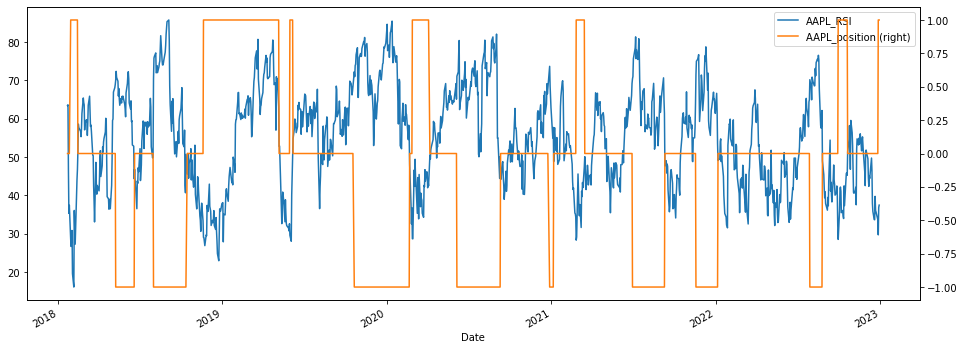

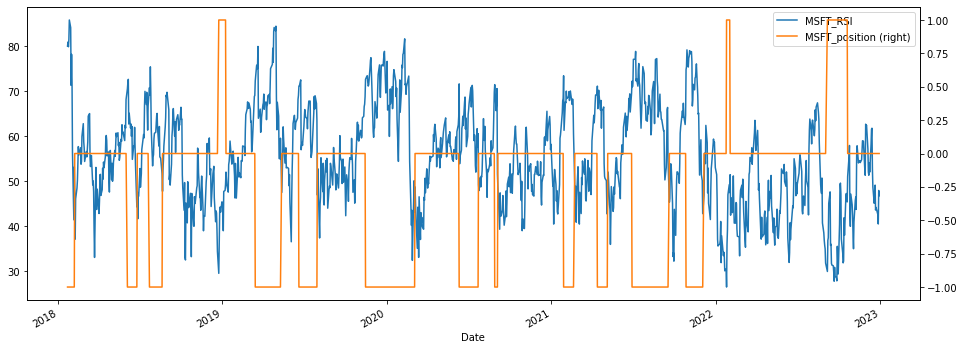

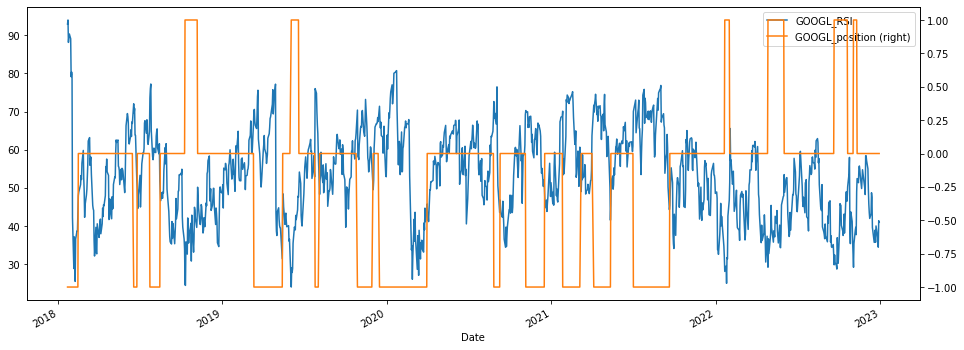

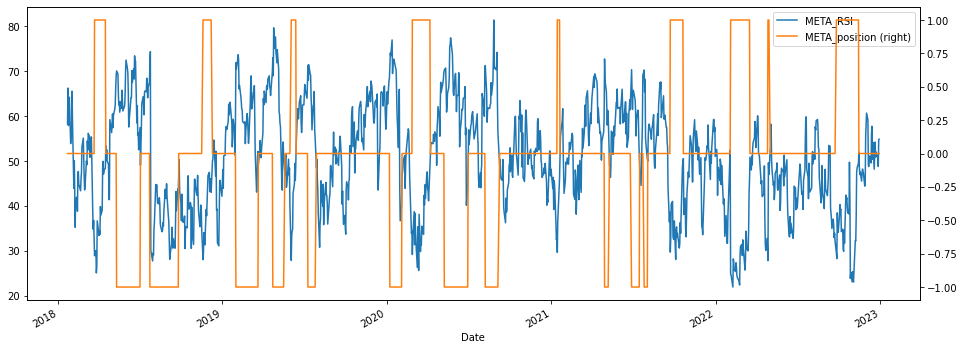

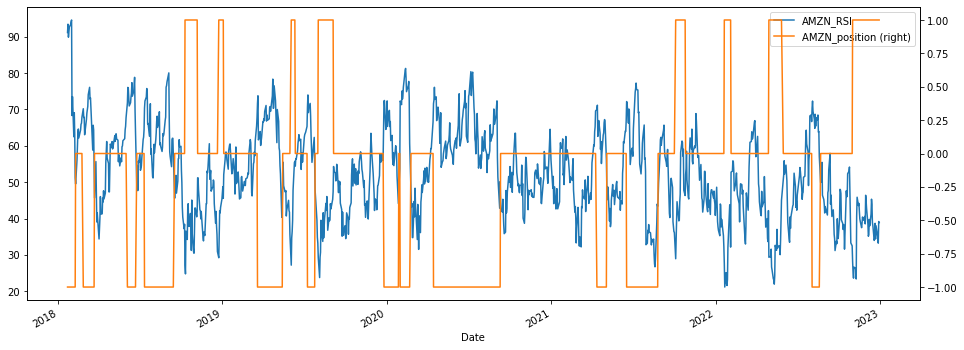

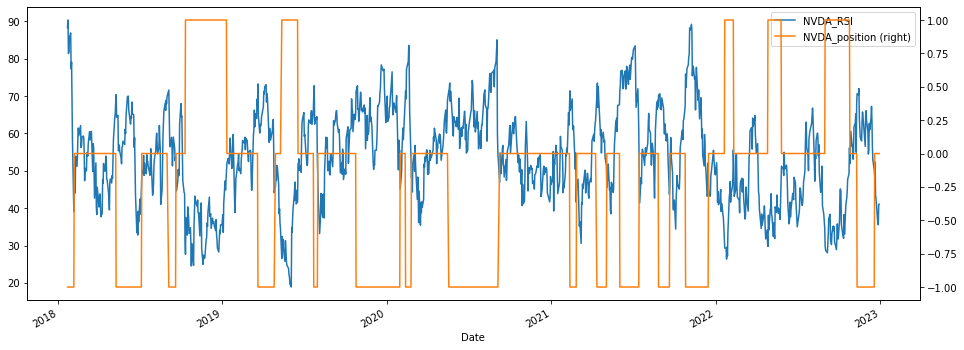

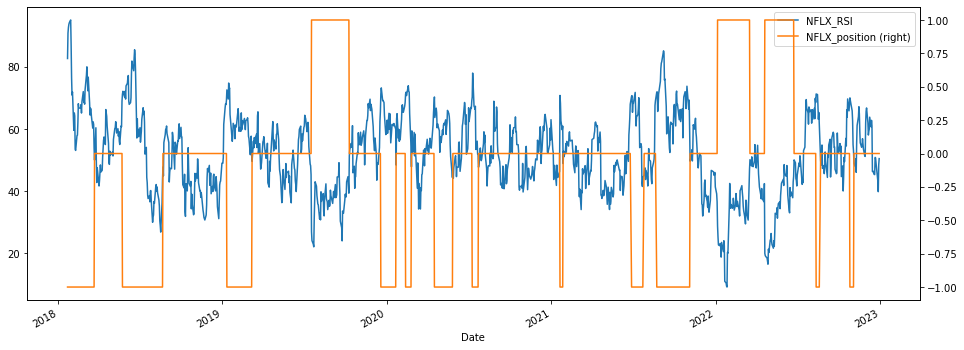

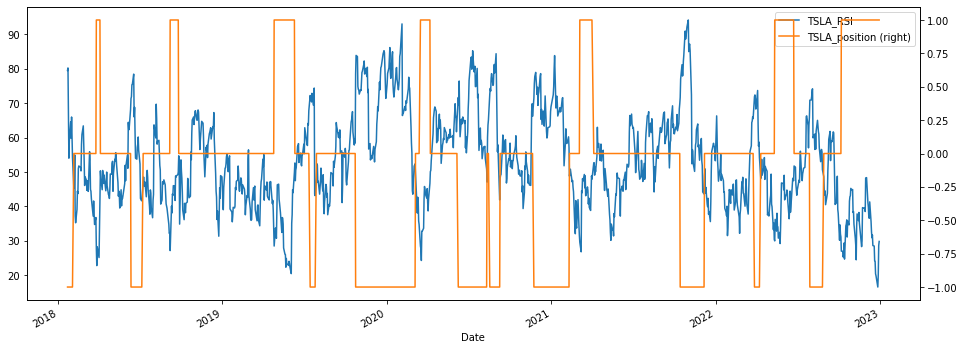

In [26]:
# 시각화
for ticker in tickers:
    ax = rsi_df[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
    ax.get_legend()


< RSI 심화 로직: 다이버전스 개념 적용>
- 주가 움직임 간의 반대 방향 움직임인 다이버전스를 감지하여 포지션 진입 시기를 결정
  (단순히 30,70 도달했다고 포지션 진입X, 다이버전스 발생 시에만 포지션 진입)
- 포지션 종료 시기는 공매도 시 rsi가 30에 진입하면 포지션 종료, 반대로 공매수 시에는 rsi가 70진입하면 포지션 종료로 변경
- 다이버전스는 RSI가 상승하면서 주가가 하락하거나, RSI가 하락하면서 주가가 상승할 때 나타남. 
- 주가가 하락하락하였음에도 이전 하락지점보다 RSI가 더 큰 경우 상승 추세로의 전환을 의미(상승 다이버전스)
- 반대로 주가 상승하였음에도 이전 상승지점보다 RSI가 더 작은 경우 하락 추세로의 전환을 의미(하락 다이버전스) 

In [ ]:
# # 위의 기본 로직 적용 시 결측치 제거했더니 ValueError: Length of values (1259) does not match length of index (1246)
# # 에러 발생. 
# # 원본 데이터프레임 백업 한거로 다시 불러오자 
# rsi_df_1=rsi_df_backup
# rsi_df_1 

In [ ]:
# data = pd.DataFrame()

In [ ]:
# for ticker in tickers:
#     # RSI 계산
#     rsi = RSIIndicator(adj_price_df[ticker]).rsi()
    
#     # 트레이딩 신호 생성
#     long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 매수 신호
#     short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 매도 신호

#     # 포지션 종료 신호 생성
#     exit_long_signal = np.where((rsi >= 25) & (rsi <= 30), -1, 0)  # 매수 포지션 종료 신호
#     exit_short_signal = np.where((rsi <= 75) & (rsi >= 70), 1, 0)  # 매도 포지션 종료 신호

#     # 다이버전스 검출 로직 추가
#     bullish_divergence_signal = np.where(
#         (rsi < 30) & (rsi > 25) & (rsi > rsi.shift(1)) & (adj_price_df[ticker] < adj_price_df[ticker].shift(1)),
#         1, 0
#     )  # 상승 다이버전스 신호
#     bearish_divergence_signal = np.where(
#         (rsi > 70) & (rsi < 75) & (rsi < rsi.shift(1)) & (adj_price_df[ticker] > adj_price_df[ticker].shift(1)),
#         -1, 0
#     )  # 하락 다이버전스 신호
    
#     # 최종 포지션 결정
#     position = long_signal + short_signal
#     position = np.where((position == 0) & (exit_long_signal == -1), 0, position)  # 매수 포지션 종료
#     position = np.where((position == 0) & (exit_short_signal == 1), 0, position)  # 매도 포지션 종료
#     position = position + bullish_divergence_signal + bearish_divergence_signal  # 다이버전스 신호 반영

#     # 결과 저장
#     rsi_df_1[ticker + '_RSI'] = rsi
#     rsi_df_1[ticker + '_position'] = position


In [ ]:
####

In [ ]:
# # 다이버전스 탐지 함수 
# def find_divergence(df):
#     # 결과를 저장할 리스트 초기화
#     peaks = []
#     troughs = []

#     # 다이버전스를 확인하기 위한 초기 값 설정
#     prev_high_price = prev_low_price = df['Close'][0]
#     prev_high_rsi = prev_low_rsi = df['RSI'][0]
#     prev_peak_date = prev_trough_date = df.index[0]

#     # 각 행마다 반복
#     for index, row in df.iterrows():
#         current_price = row['Close']
#         current_rsi = row['RSI']
#         current_date = index

#         # 고점 다이버전스를 찾는 경우
#         if current_price > prev_high_price and current_rsi < prev_high_rsi:
#             if prev_high_rsi >= 70:  # 과매수 구간 확인
#                 peaks.append({'Date': prev_peak_date, 'Price': prev_high_price, 'RSI': prev_high_rsi})

#         # 저점 다이버전스를 찾는 경우
#         elif current_price < prev_low_price and current_rsi > prev_low_rsi:
#             if prev_low_rsi =< 30:  # 과매도 구간 확인
#                 troughs.append({'Date': prev_trough_date, 'Price': prev_low_price, 'RSI': prev_low_rsi})

#         # 이전 고점과 저점을 현재 행의 값으로 갱신
#         if current_price > prev_high_price or current_rsi > prev_high_rsi:
#             prev_high_price = current_price
#             prev_high_rsi = current_rsi
#             prev_peak_date = current_date

#         if current_price < prev_low_price or current_rsi < prev_low_rsi:
#             prev_low_price = current_price
#             prev_low_rsi = current_rsi
#             prev_trough_date = current_date

#     # 결과 데이터프레임 생성
#     peaks_df = pd.DataFrame(peaks)
#     troughs_df = pd.DataFrame(troughs)
    
#     return peaks_df, troughs_df



In [ ]:
# print(peaks_df)


In [ ]:
# # 데이터프레임 초기화
# data = pd.DataFrame(index=adj_price_df.index)

# # 각 티커별로 RSI 및 포지션 계산 후 다이버전스 탐지
# for ticker in tickers:
#     # RSI 계산
#     df = pd.DataFrame()
#     df['Close'] = adj_price_df[ticker]
#     df['RSI'] = RSIIndicator(df['Close']).rsi()
    
#     # 초기 포지션 값 설정
#     df['position'] = 0  # 이 부분은 실제 전략에 따라 수정하세요

#     # 다이버전스 탐지
#     peaks_df, troughs_df = find_divergence(df)

#     # 다이버전스 신호를 포지션에 반영
#     for date in peaks_df['Date']:
#         df.loc[date, 'position'] = max(df.loc[date, 'position'], -1)
#     for date in troughs_df['Date']:
#         df.loc[date, 'position'] = min(df.loc[date, 'position'], 1)

#     # 결과 저장
#     data[ticker + '_RSI'] = df['RSI']
#     data[ticker + '_position'] = df['position']

In [ ]:
####

In [ ]:
# # 그러고 나서 다시 결측치 제거 ㄱㄱ
# rsi_df_1.dropna(inplace=True)
# rsi_df_1
# print(rsi_df_1.to_string())


In [ ]:
# # 그리고 다시 시각화
# for ticker in tickers:
#     ax = data[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
#     ax.get_legend()


In [ ]:
# # 기본로직 vs 심화로직 포지션 시각화 비교 (ㅅㅂ 왜 똑같이 나오냐)
# # 7행 2열의 서브플롯 생성
# fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(12, 4 * len(tickers)))

# # 각 티커에 대해 rsi_df_1과 rsi_df의 그래프 생성
# for i, ticker in enumerate(tickers):
#     # rsi_df의 그래프 (첫 번째 열)ㅠ
#     ax1 = axes[i, 0]
#     ax1.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} basic logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

#     # data의 그래프 (두 번째 열)
#     ax1 = axes[i, 1]
#     ax1.plot(data.index.to_numpy(), data[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(data.index.to_numpy(), data[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} advanced logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

# plt.tight_layout()
# plt.show()


In [ ]:
# is_same = rsi_df.equals(data)
# is_same

# Bollinger Band Strategy

In [27]:
bb_df = pd.DataFrame()


In [28]:
# 각 티커에 대한 볼린저 밴드 계산 및 컬럼 추가
for ticker in tickers:
    
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # middle band(20일 이동 평균)
    bb_df[ticker + "_middle_band"] = indicator_bb.bollinger_mavg()

    # upper band
    bb_df[ticker + "_upper_band"] = indicator_bb.bollinger_hband()

    # lower band
    bb_df[ticker + "_lower_band"] = indicator_bb.bollinger_lband()


In [29]:
# 포지션 데이터 입력 및 컬럼 추가
for ticker in tickers:
    # 볼린저 밴드 계산
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # 포지션 계산
    # 하단 밴드 이탈 시 매수 포지션 (1)
    # 상단 밴드 이탈 시 매도 포지션 (-1)
    # 중간 밴드 도달 시 포지션 종료 (0)
    bb_df[ticker + '_position'] = 0
    bb_df.loc[adj_price_df[ticker] < indicator_bb.bollinger_lband(), ticker + '_position'] = 1
    bb_df.loc[adj_price_df[ticker] > indicator_bb.bollinger_hband(), ticker + '_position'] = -1
    bb_df.loc[adj_price_df[ticker].between(indicator_bb.bollinger_lband(), indicator_bb.bollinger_hband()), ticker + '_position'] = 0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


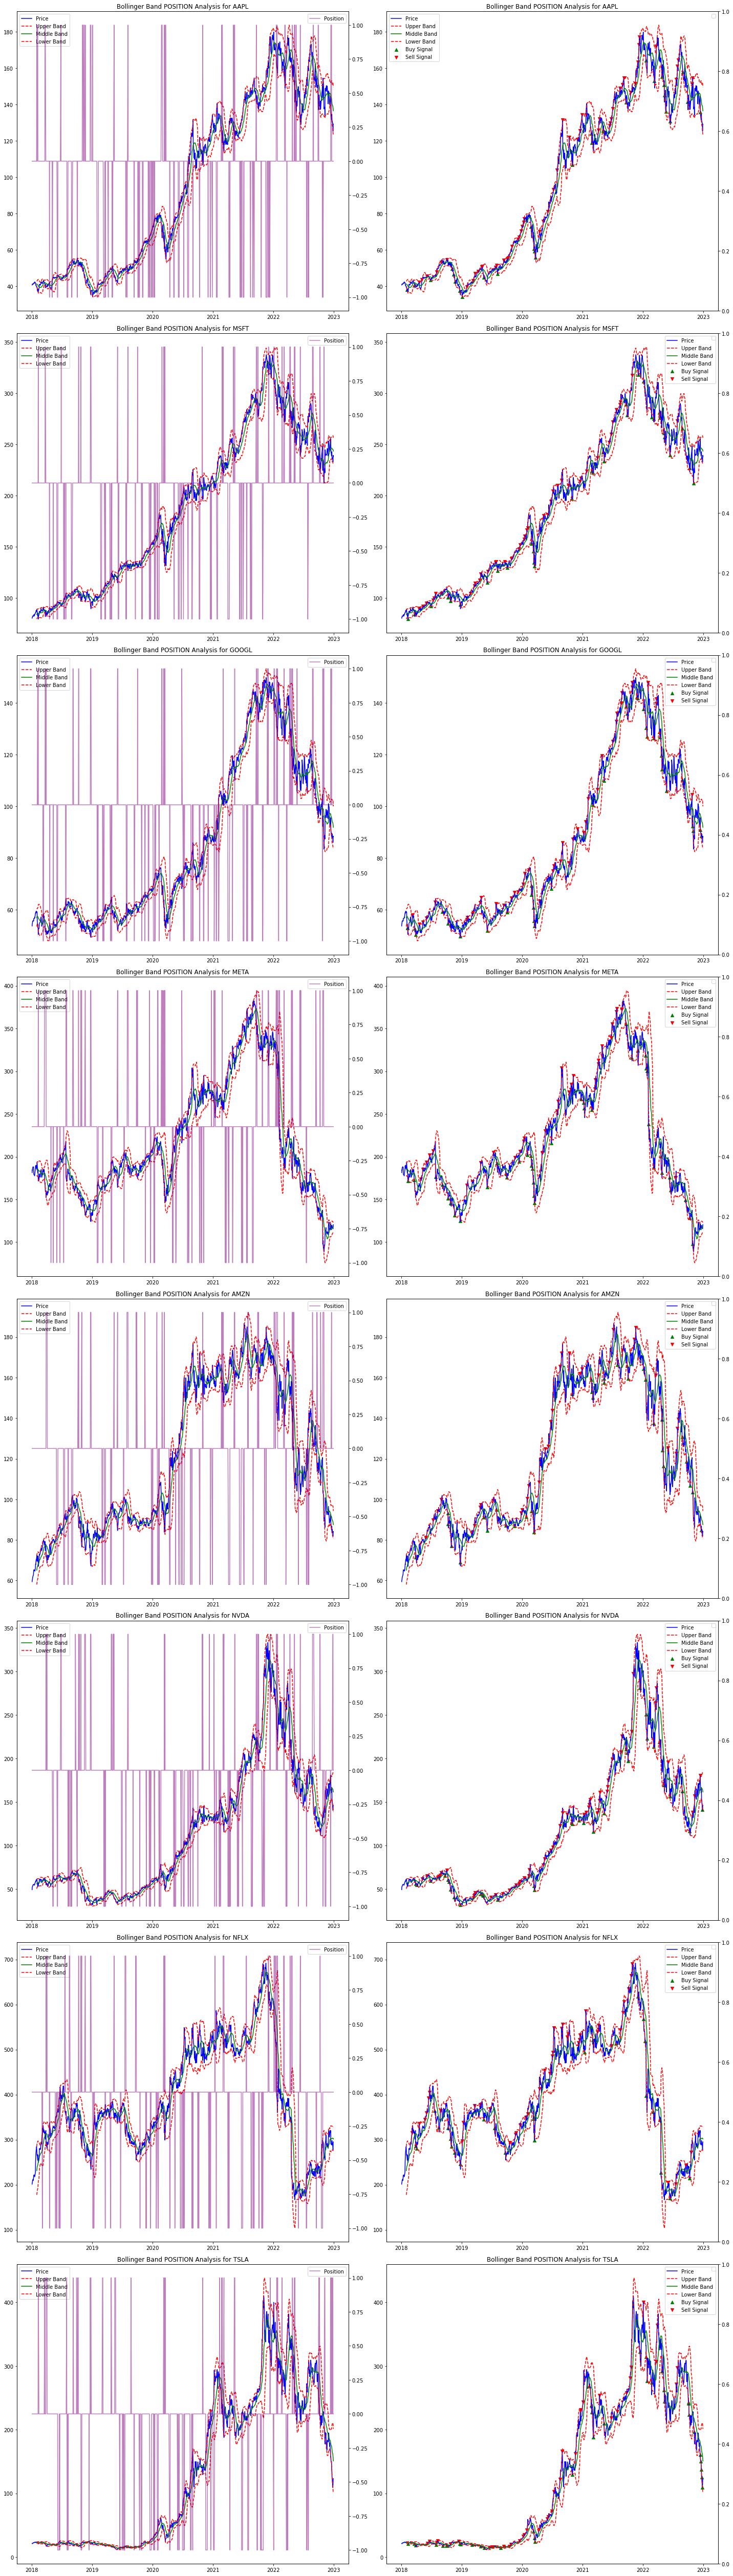

In [36]:
# 7행 2열로 그래프 나누기
fig, axes = plt.subplots(8, 2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = bb_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 볼린저 밴드 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax1.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax1.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax1.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, bb_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 볼린저 밴드 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax2.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax2.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax2.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    buy_signals = (adj_price_df[ticker].values < bb_df[ticker + '_lower_band'].values) & (np.roll(adj_price_df[ticker].values, 1) >= np.roll(bb_df[ticker + '_lower_band'].values, 1))
    sell_signals = (adj_price_df[ticker].values > bb_df[ticker + '_upper_band'].values) & (np.roll(adj_price_df[ticker].values, 1) <= np.roll(bb_df[ticker + '_upper_band'].values, 1))
    ax2.scatter(index_array[buy_signals], adj_price_df[ticker][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], adj_price_df[ticker][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2_2 = ax2.twinx()
    
    ax2.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax2.legend()
    ax2_2.legend()

plt.tight_layout()
plt.show()



# Performance Evaluation

- 1) cumulative returns
- 2) bnh_ratio	
- 3) sharpe_ratio
- 4) max_drawdown	
- 5) calmar_ratio

### 1) cumulative Returns(누적 수익률)

- SMA

In [37]:

for ticker in tickers:
    # 일일 백분율 변화 계산
    sma_df[ticker+'_ret'] = sma_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    sma_df[ticker+'_ret'] = sma_df[ticker+'_ret'] * sma_df[ticker + '_position'].shift(1)

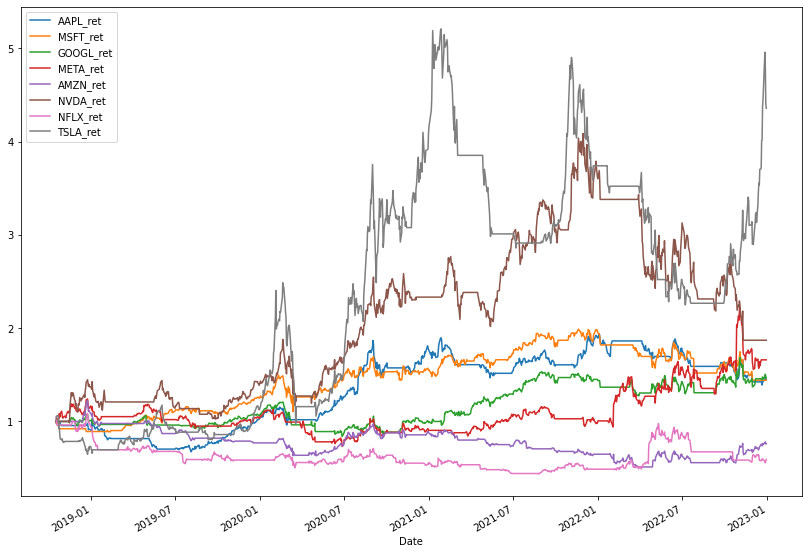

In [38]:
#sma전략 누적수익률 시각화 
ax = (1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- MACD

In [46]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    macd_df[ticker+'_ret'] = macd_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    macd_df[ticker+'_ret'] = macd_df[ticker+'_ret'] * macd_df[ticker + '_position'].shift(1)

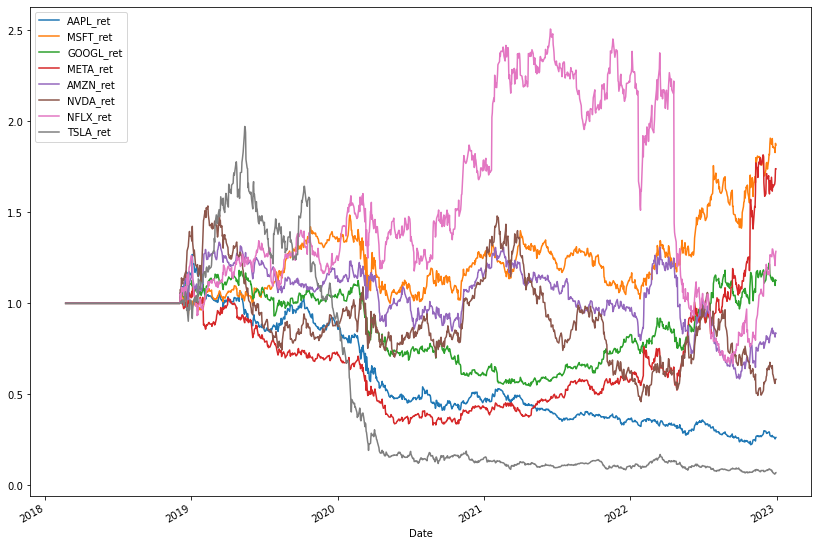

In [47]:
ax = (1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- RSI

In [48]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')

In [49]:
#rsi for performance evaluation
for ticker in tickers:
    # 일일 백분율 변화를 계산
    rsi_df[ticker+'_ret'] = combined_df[ticker].pct_change()

    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    rsi_df[ticker+'_ret'] = rsi_df[ticker+'_ret'] * rsi_df[ticker + '_position'].shift(1)


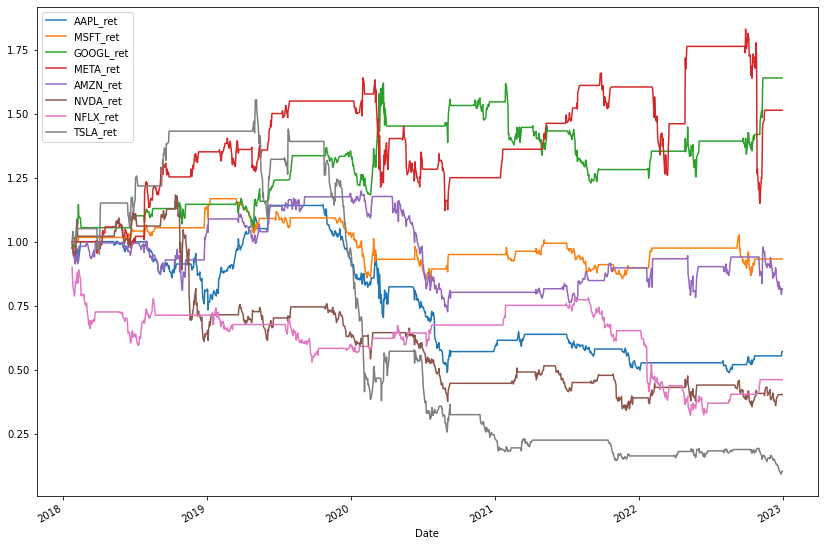

In [50]:
#rsi전략 성과 시각화 
ax = (1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- Bollinger Band

In [58]:
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')

In [60]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    bb_df[ticker+'_ret'] = combined_df1[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    bb_df[ticker+'_ret'] = bb_df[ticker+'_ret'] * bb_df[ticker + '_position'].shift(1)

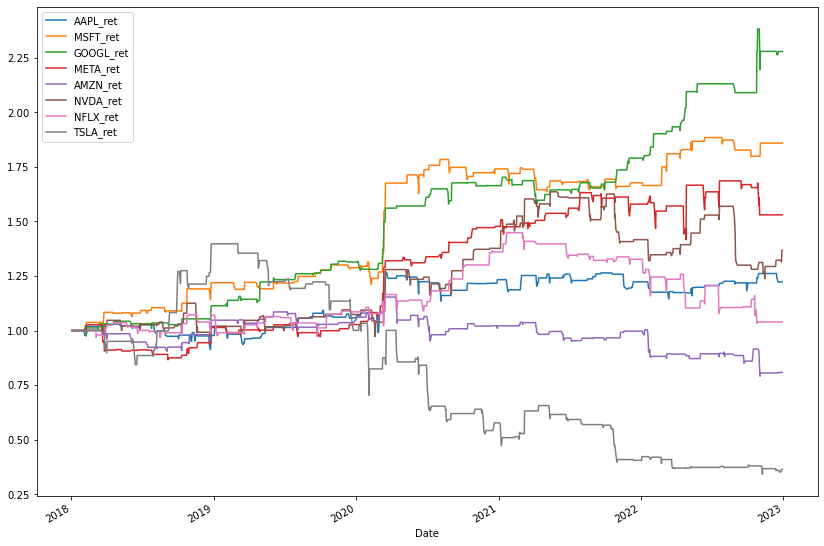

In [61]:
#bb전략 성과 시각화 
ax = (1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

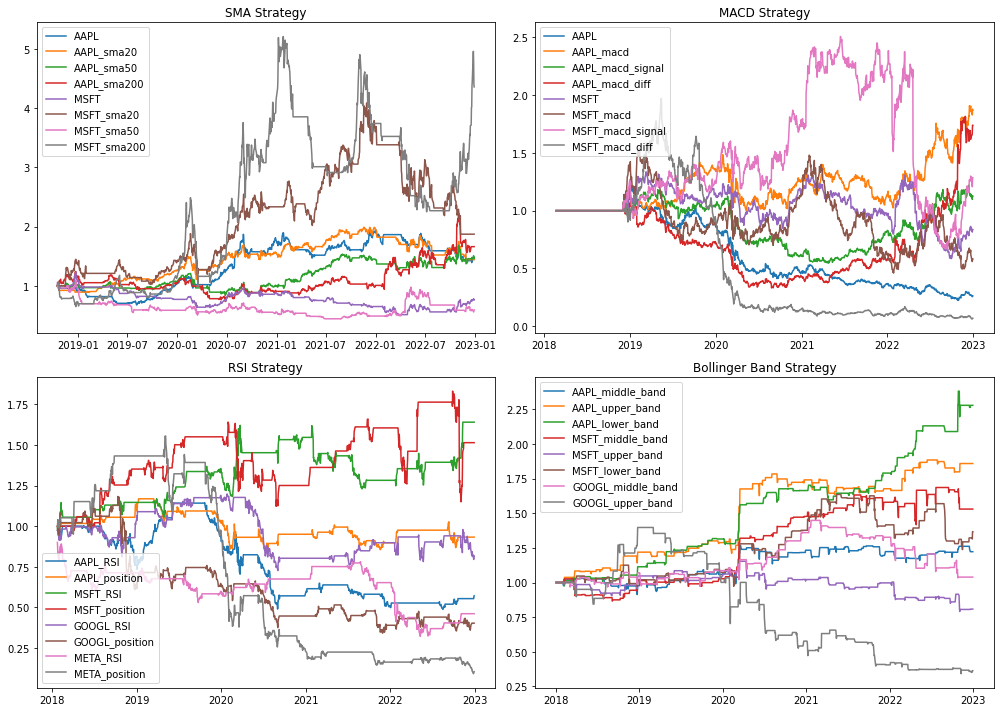

In [62]:
#4개 지표별 누적 수익률 그래프 서브 플롯으로 비교 

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# SMA 
axs[0, 0].plot((1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 0].set_title('SMA Strategy')
axs[0, 0].legend(sma_df.columns)

# MACD 
axs[0, 1].plot((1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 1].set_title('MACD Strategy')
axs[0, 1].legend(macd_df.columns)

# RSI 
axs[1, 0].plot((1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 0].set_title('RSI Strategy')
axs[1, 0].legend(rsi_df.columns)

# Bollinger Band 
axs[1, 1].plot((1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 1].set_title('Bollinger Band Strategy')
axs[1, 1].legend(bb_df.columns)

plt.tight_layout()
plt.show()


/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


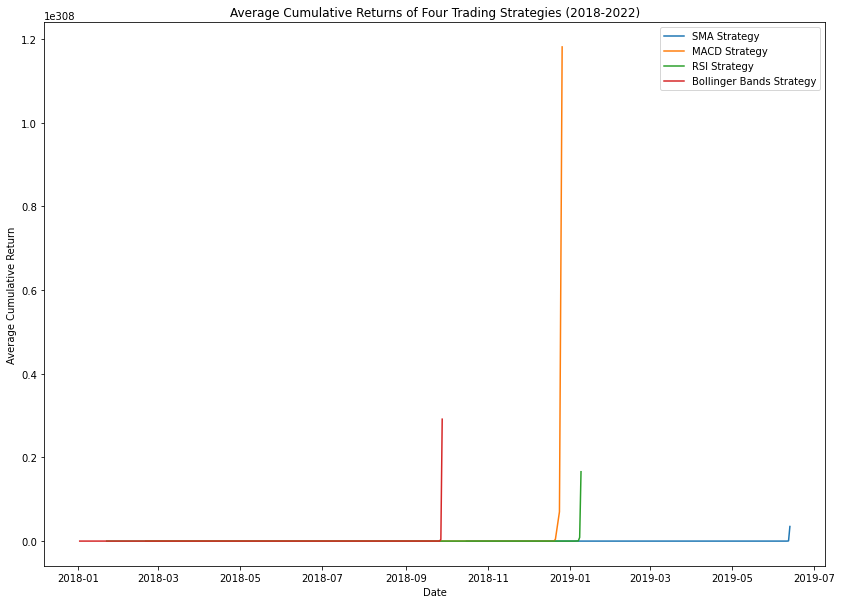

In [64]:
# 날짜 범위 설정
start_date = '2018-01-01'
end_date = '2022-12-31'

# 각 전략별 데이터프레임에서 해당 날짜 범위에 맞게 데이터 필터링
sma_df_filtered = sma_df.loc[start_date:end_date]
macd_df_filtered = macd_df.loc[start_date:end_date]
rsi_df_filtered = rsi_df.loc[start_date:end_date]
bb_df_filtered = bb_df.loc[start_date:end_date]

# 필터링된 데이터를 사용하여 각 전략별 평균 일일 수익률 계산
sma_mean_ret = sma_df_filtered.mean(axis=1)
macd_mean_ret = macd_df_filtered.mean(axis=1)
rsi_mean_ret = rsi_df_filtered.mean(axis=1)
bb_mean_ret = bb_df_filtered.mean(axis=1)

# 각 전략별 평균 누적 수익률 계산
sma_cum_ret = (1 + sma_mean_ret).cumprod()
macd_cum_ret = (1 + macd_mean_ret).cumprod()
rsi_cum_ret = (1 + rsi_mean_ret).cumprod()
bb_cum_ret = (1 + bb_mean_ret).cumprod()

# 시각화
plt.figure(figsize=(14, 10))
plt.plot(sma_cum_ret, label='SMA Strategy')
plt.plot(macd_cum_ret, label='MACD Strategy')
plt.plot(rsi_cum_ret, label='RSI Strategy')
plt.plot(bb_cum_ret, label='Bollinger Bands Strategy')

plt.title('Average Cumulative Returns of Four Trading Strategies (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.legend()
plt.show()


### 지표 별 전략 vs Buy & Hold Strategy

In [65]:
def bnh_ratio(DF, ticker):
    "calculate relative performance of the strategy versus buy & hold strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_return_bnh'] = (1 + df['return']).cumprod()
    return df.iloc[-1]['cum_return'] / df.iloc[-1]['cum_return_bnh']

- sma

In [66]:
# sma 전략성과
for ticker in tickers:
    print("SMA performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(sma_df, ticker)))

SMA performance relative to B&H strategy on AAPL is 0.5943488913977505
SMA performance relative to B&H strategy on MSFT is 0.6365109071483579
SMA performance relative to B&H strategy on GOOGL is 0.9419310822446606
SMA performance relative to B&H strategy on META is 2.190333530817603
SMA performance relative to B&H strategy on AMZN is 0.8238017101571149
SMA performance relative to B&H strategy on NVDA is 0.7800107878821282
SMA performance relative to B&H strategy on NFLX is 0.6961762095577345
SMA performance relative to B&H strategy on TSLA is 0.6521796412599108


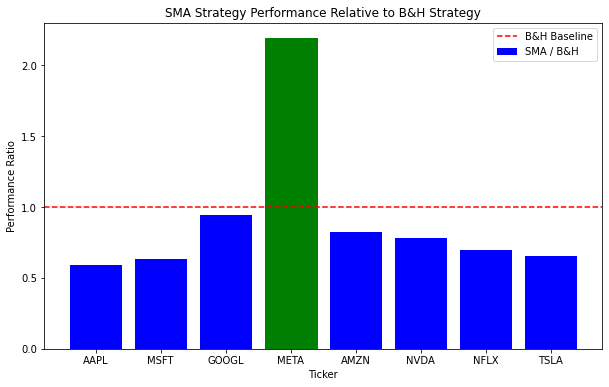

In [82]:

# 제공된 성능 비율 데이터
performance_ratios = {
    'AAPL': 0.5943488913977505,
    'MSFT': 0.6365109071483579,
    'GOOGL': 0.9419310822446606,
    'META': 2.190333530817603,
    'AMZN': 0.8238017101571149,
    'NVDA': 0.7800107878821282,
    'NFLX': 0.6961762095577345,
    'TSLA': 0.6521796412599108
}

# 데이터 준비
tickers = list(performance_ratios.keys())
ratios = list(performance_ratios.values())

# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='SMA / B&H')

# 1을 기준으로 선을 그려 SMA 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

# 그래프 제목 및 레이블 설정
plt.title('SMA Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


- macd

In [75]:
# sma 전략성과
for ticker in tickers:
    print("MACD performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(macd_df, ticker)))

MACD performance relative to B&H strategy on AAPL is 0.0828620577984245
MACD performance relative to B&H strategy on MSFT is 0.684078721172966
MACD performance relative to B&H strategy on GOOGL is 0.7044671262474
MACD performance relative to B&H strategy on META is 2.544055852447161
MACD performance relative to B&H strategy on AMZN is 0.7307795276979127
MACD performance relative to B&H strategy on NVDA is 0.24572702946466196
MACD performance relative to B&H strategy on NFLX is 1.2143599093523871
MACD performance relative to B&H strategy on TSLA is 0.012473244462496393


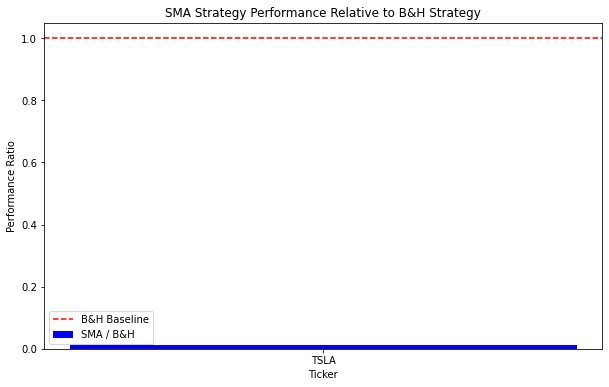

In [83]:

# 제공된 성능 비율 데이터
for ticker in tickers:
    
    performance_ratios = {
        ticker: bnh_ratio(macd_df, ticker),
    
    }

# 데이터 준비
tickers = list(performance_ratios.keys())
ratios = list(performance_ratios.values())

# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='SMA / B&H')

# 1을 기준으로 선을 그려 SMA 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

# 그래프 제목 및 레이블 설정
plt.title('SMA Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()


- rsi

In [72]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')


In [73]:
#rsi 전략성과 
for ticker in tickers:
    print("RSI performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df, ticker)))

RSI performance relative to B&H strategy on AAPL is 0.18497170068787605
RSI performance relative to B&H strategy on MSFT is 0.33544707816395447
RSI performance relative to B&H strategy on GOOGL is 1.0819954377052081
RSI performance relative to B&H strategy on META is 2.3320678072316836
RSI performance relative to B&H strategy on AMZN is 0.6448708587969011
RSI performance relative to B&H strategy on NVDA is 0.15948637321266748
RSI performance relative to B&H strategy on NFLX is 0.35596042401424993
RSI performance relative to B&H strategy on TSLA is 0.019790010521721104


- bollinger bands

In [79]:
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')


In [81]:
#rsi 전략성과 
for ticker in tickers:
    print("BOLLINGER BANDS performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df1, ticker)))

BOLLINGER BANDS performance relative to B&H strategy on AAPL is 0.3853530087318437
BOLLINGER BANDS performance relative to B&H strategy on MSFT is 0.6275068972006259
BOLLINGER BANDS performance relative to B&H strategy on GOOGL is 1.3863478401102909
BOLLINGER BANDS performance relative to B&H strategy on META is 2.3071479288254526
BOLLINGER BANDS performance relative to B&H strategy on AMZN is 0.5719530531975688
BOLLINGER BANDS performance relative to B&H strategy on NVDA is 0.4616067068882668
BOLLINGER BANDS performance relative to B&H strategy on NFLX is 0.7085651996132329
BOLLINGER BANDS performance relative to B&H strategy on TSLA is 0.0630565229924951


### Sharpe Ratio

In [ ]:
#누적 수익률 지표 
def CAGR(DF, ticker):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    n = len(df) / 250
    CAGR = (df.iloc[-1]['cum_return']) ** (1 / n) - 1
    return CAGR

In [ ]:
for ticker in tickers:
    print("CAGR of SMA strategy on {} = {}".format(ticker, CAGR(sma_df, ticker)))

In [ ]:
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df, ticker)))

In [ ]:
#수익률 변동성 
def volatility(DF, ticker):
    "function to calculate annualized Volatility of a trading strategy"
    df = DF.copy()
    vol = df[ticker+'_ret'].std() * np.sqrt(250)
    return vol

In [ ]:
for ticker in tickers:
    print("Volatility for SMA strategy on {} = {}".format(ticker, volatility(sma_df, ticker)))

In [ ]:
#rsi
for ticker in tickers:
    print("Volatility for RSI strategy on {} = {}".format(ticker, volatility(combined_df, ticker)))

In [ ]:
# 투자전략의 위험 대비 수익 
def sharpe(DF, ticker, rf):
    "function to calculate Sharpe Ratio of a trading strategy"
    df = DF.copy()
    return (CAGR(df, ticker) - rf) / volatility(df, ticker)

In [ ]:
for ticker in tickers:
    print("Sharpe ratio for SMA strategy on {} = {}".format(ticker, sharpe(sma_df, ticker, 0.04)))

In [ ]:
#rsi
for ticker in tickers:
    print("Sharpe ratio for RSI strategy on {} = {}".format(ticker, sharpe(combined_df, ticker, 0.04)))

### Maximum Drawdown & Calmar Ratio

In [ ]:
#최대 하락 폭
def max_dd(DF, ticker):
    "function to calculate Max Drawdown"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    return (df['drawdown'] / df['cum_roll_max']).max()
#CAGR + max drawdown 조합     
def calmar(DF, ticker):
    "function to calculate Calmar Ratio"
    df = DF.copy()
    return CAGR(df, ticker) / max_dd(df, ticker)

In [ ]:
#Calmar Ratio는 연 평균 수익과 최대 하락폭 간의 비율로, 
#투자 전략의 위험 대비 기대 수익을 나타내며, 
#높은 Calmar Ratio는 투자 전략의 높은 수익과 낮은 하락폭을 나타냄

In [ ]:
#sma
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(sma_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(sma_df, ticker)))

In [ ]:
#rsi
for ticker in tickers:
    print("Max Drawdown of RSI on {} = {}".format(ticker, max_dd(combined_df, ticker)))
    print("Calmar Ratio of RSI on {} = {}".format(ticker, calmar(combined_df, ticker)))

### Summary Evaluation

In [ ]:
eval_df = pd.DataFrame()
eval_df.index = tickers

In [ ]:
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(sma_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(sma_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(sma_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(sma_df, ticker)

In [ ]:
eval_df

In [ ]:
#rsi
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df, ticker)

In [ ]:
#rsi
eval_df